In [57]:
#RANGEL PEREZ LUIS FERNANDO 6IV8

RANGEL PEREZ LUIS FERNANDO 6IV8

In [58]:
import pandas as pd
import numpy as np 
from time import time
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [59]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.info()
diabetes_df.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [60]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
diabetes_df['Outcome'].value_counts()	

Outcome
0    500
1    268
Name: count, dtype: int64

In [62]:
lista_caract = [
    'Pregnancies', 
    'Glucose', 
    'BloodPressure', 
    'SkinThickness', 
    'Insulin', 
    'BMI', 
    'DiabetesPedigreeFunction', 
    'Age'
]

x = diabetes_df[lista_caract]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [63]:
lista_etiq = ['Outcome']
y = diabetes_df[lista_etiq]
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [64]:
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
)

In [65]:
x_train.shape

(576, 8)

In [66]:
y_train.shape

(576, 1)

In [67]:
x_test.shape

(192, 8)

In [68]:
y_test.shape

(192, 1)

In [69]:
clf = SVC(kernel='linear')

In [70]:
hora_ini = time()
#iniciamos el emtrenamiento usando el metodo fit
#los valoresa son x, y

#El .ravel() que final de y.values es un pequeño truco para ca,biar su forma
#Esto permite convertir una matriz de dos dimenciones en una de una
#con esto cada elemento de la matriz corresponde a un elemento x
clf.fit(x_train, y_train.values.ravel())
#Iniciamos el tiemnpo tomado para el entrenamiento
print("Entrenamiento terminado en {} segundos".format(time()-hora_ini))

Entrenamiento terminado en 0.8265881538391113 segundos


In [71]:
hora_ini = time()
#Iniciamos nnuestra prueba de prediccion coon muestra X de prueba 
y_pred = clf.predict(x_test)
print("Predicción terminada en {} segundos".format(time()-hora_ini))

Predicción terminada en 0.001310586929321289 segundos


In [72]:
#Evaluamos precicon
accuracy_score(y_test, y_pred)

0.8229166666666666

Una matriz de confuncionos ayuda a tener una mejor ideasa del reandimiento de nuestro modelo, compara la cantidad de aciertos de cada clase de nuestros datos de prueba y datos calculados

In [73]:
conf_diabetes = confusion_matrix(y_test, y_pred)
conf_diabetes

array([[114,   9],
       [ 25,  44]])

In [76]:
def plot_cm(cm, classes):
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title("Matriz de Confusión")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2
    for indice_fila, fila in enumerate(cm):
        for indice_columna, columna in enumerate(fila):
            color = "white" if cm[indice_fila, indice_columna] > thresh else "black"
            
            plt.text(
                indice_columna,
                indice_fila,
                cm[indice_fila, indice_columna],
                color=color,
                horizontalalignment="center",
            )

    plt.ylabel("Variables reales")  
    plt.xlabel("Variables calculadas")
    plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

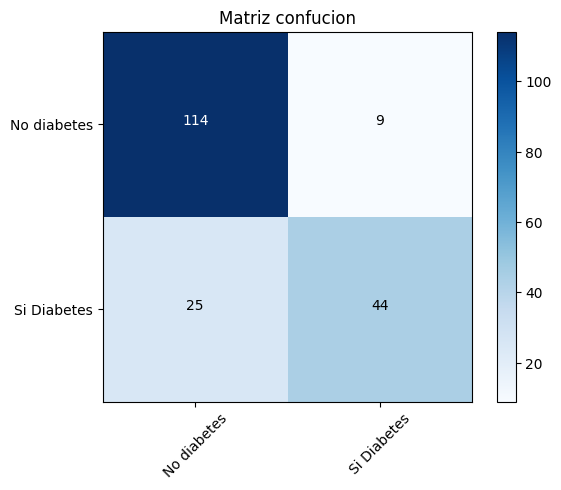

In [77]:
#cm = muestra la matriz de confucion
#Classes = la clase a predecir
plot_cm(conf_diabetes, ['No diabetes', 'Si Diabetes'])